# Project: Wrangling WeRateDogs' Enhanced Twitter Archive

>### Scope
>---------------------------------------------------------
>WeRateDogs (later referred to as WRD in this document) is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WRD has over 4 million followers and has received international media coverage.
>
>This project focuses on actualizing and accentuating the three data wrangling techniques on the WRD Twitter archive. WRD downloaded their Twitter archive and >sent it to Udacity via email exclusively for use in this project. The archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of >their tweets as they stood on August 1, 2017.

>### Modules used in this notebook:
>* Pandas
>* Numpy
>* Tweepy
>* Requests
>* Plotly
>* TextBlob
>* WordCLoud

In [1366]:
pip install python-dotenv tweepy textblob wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: python-dotenv in c:\users\tevinaduma\anaconda3\lib\site-packages (0.20.0)



----

>### Imports

In [1756]:
import requests
import tweepy as twpy
from dotenv import load_dotenv
from textblob import TextBlob
from wordcloud import WordCloud
import _json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.express as px

%matplotlib inline

----

>### Gather
>This project involves obtaining three seperate datasets from various sources. I will be using different methods to obtain each dataset as specified below. 

> This custom function built from Pandas' `read_csv()` method will be used to read various datasets. The `header` and `names` parameters will override each other depending on which of the two is set to `None`

In [1368]:
def open_set(csv, sep=',', header=0, names=[]):
    df = pd.read_csv(csv, low_memory=False, sep=sep, names=names, header=header)
    
    return df

> #### **`twitter-archive-enhanced` table**
>
> WRD's Twitter archive data was provided by Udacity and **downloaded manually through the Chrome browser.** I will import the data locally from my storage.

In [1817]:
df_tw_arch = open_set('data/twitter-archive-enhanced.csv', header=0, names=None)
df_tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


----

> #### **`image-predictions` table**
>
>The `image_predictions.tsv` file is present in each tweet according to a neural network. It is hosted on Udacity's servers and will be **downloaded >programmatically using the Requests library**. 
>
>The content obtained from the file hosted on the url will be written into a file on the local machine using Python's **open()** method. 

In [1370]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

> * Use **`requests.get()`** to obtain the data from the url.
> * Parse the content into a new file named `image-predictions.tsv`. (Note the file is opened using `wb` since the content obtained is returned in byte format)

In [1371]:
r = requests.get(url)

try:
    f = open('image-predictions.tsv', 'wb')
    f.write(r.content)
    
finally:
    f.close()

> * tsv stands for tab-separated-values so it would make sense to specify tabs (`\t`) as the separator in Pandas' `read_csv() method`

In [1816]:
df_image_pred = open_set('data/image-predictions.tsv', sep='\t', names=None, header=0)
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


----

>#### **Obtaining additional tweet data from `Twitter API` using Python's `Tweepy`** module
>
>For our final dataset, we will be using the Twitter API and Python's Tweepy library to query Twitter for each tweet's **retweet_count**, **favorite_count**, >**geo data** and **language data**. These attributes will later be used to generate insights.
>
>**Note that you need either a combination of your consumer_key, consumer_secret, access_key and access_key secret or a bearer_token to query data through the Twitter API.**

In [1373]:
# Obtain credentials
load_dotenv('.env')

True

> I put to use Python's `dotenv` library to cache my `bearer_token` from a secret file and obtain it's value using the `os.getenv` method.

> I opted for a custom function to obtain tweet data through Tweepy's [**_get_status()_**](http://docs.tweepy.org/en/v3.5.0/api.html) method. The `tweet_id` from  the `df_tw_arch` dataset will be converted to a list and passed into the function. Each tweet's JSON data that I require for this project will be parsed into a new file (`tweet_json.txt`) and appended one after the other.
>
> There are a few tweets and retweets that may have been deleted since WRD's submission of their archive. I have used a `try-except` block to capture their **tweet_id** into a separate array for later analysis.

In [1374]:
# custom to extract tweet data
def get_tweets(ids):
    
    # Authorization to bearer_token
    auth = twpy.OAuth2BearerHandler(os.getenv('BEARER_TOKEN'))
    
    # Calling api
    api = twpy.API(auth, wait_on_rate_limit = True)
    
    # Empty Array
    del_tweets = []
    
    # Start a code timer for the loop
    start = timeit.timeit()  
    for tw_id in ids: 
        try:
            tw_status = api.get_status(tw_id, tweet_mode='extended')._json
            try:
                f = open('tweet_json.txt', 'a+', encoding='utf-8')
                f.write(f"{tw_status['id']},{tw_status['retweet_count']},{tw_status['favorite_count']},{tw_status['geo']},{tw_status['lang']}\n")
            finally:
                f.close()
            rt_count = tw_status['retweet_count']
            fv_count = tw_status['favorite_count']
                        
            print(f'This tweet -> {tw_id} has {rt_count} retweets and {fv_count} likes')
        except Exception as e:
            print(f'This tweet -> {tw_id} has been deleted')
            del_tweets.append({'tweet_id': tw_id})
    
    # Stop the code timer for our loop
    end = timeit.timeit()
    
    # Calculate how long it took to run
    print(f'This code took {end - start} to run')
    
    # Print out the deleted tweet_ids
    return (f'These are the deleted tweet_ids:\n{del_tweets}')

> * Capture all the data in the `tweet_id` column of `df_tw_arch` into a list

In [1375]:
tw_ids = list(df_tw_arch.tweet_id)
tw_ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

> * Pass the list of tweet_ids into our custom function `get_tweets()`

In [1376]:
get_tweets(tw_ids)

This tweet -> 892420643555336193 has 7009 retweets and 33807 likes
This tweet -> 892177421306343426 has 5301 retweets and 29330 likes
This tweet -> 891815181378084864 has 3481 retweets and 22052 likes
This tweet -> 891689557279858688 has 7225 retweets and 36938 likes
This tweet -> 891327558926688256 has 7760 retweets and 35308 likes
This tweet -> 891087950875897856 has 2602 retweets and 17812 likes
This tweet -> 890971913173991426 has 1663 retweets and 10363 likes
This tweet -> 890729181411237888 has 15753 retweets and 56865 likes
This tweet -> 890609185150312448 has 3620 retweets and 24525 likes
This tweet -> 890240255349198849 has 6098 retweets and 27963 likes
This tweet -> 890006608113172480 has 6152 retweets and 27037 likes
This tweet -> 889880896479866881 has 4166 retweets and 24569 likes
This tweet -> 889665388333682689 has 8349 retweets and 42050 likes
This tweet -> 889638837579907072 has 3715 retweets and 23678 likes
This tweet -> 889531135344209921 has 1881 retweets and 13353 

KeyboardInterrupt: 

> * We will then read the data from `tweet_json.txt` using either one of Pandas' `read_csv()` or `read_table()` methods. I will specify the column tags using the `names` parameter.

In [1815]:
df_tw_data = open_set('data/tweet_json.txt', names=['tweet_id', 'retweet_count', 'favorite_count', 'geo_data', 'lang_data'], header=None)

> * To later assess the data obtained from the Twitter api visually using Excel/Sheets, I will export it to a csv file.

In [1378]:
df_tw_data.to_csv('data/tw_data.csv',index=False)
df_tw_data

,tweet_id,retweet_count,favorite_count,lang_data
0,892420643555336193,7010,33829,en
1,892177421306343426,5301,29340,en
2,891815181378084864,3482,22070,en
3,891689557279858688,7228,36953,en
4,891327558926688256,7765,35324,en
...,...,...,...,...
2320,666049248165822465,37,89,en
2321,666044226329800704,115,247,en
2322,666033412701032449,36,100,en
2323,666029285002620928,39,112,en


----

> ### Assess
>
>I will use a spreadsheet program for my visual assessment (Google Sheets, MS Excel etc) and employ Pandas' library for my programmatic assessment.

> #### **`df_tw_arch` dataset**

> ##### Visual Assessment
> ----

![alt](img/tw_arch.png)

> * There are a few columns with glaringly empty fields: `in_reply_to_status`, `in_reply_to_user_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` **(Quality Issue)**
> * At a glance, `rating_denominator` seems to have only one unique value and hence no insights can be obtained from that column. I will investigate this further. **(Quality issue)**
>* The four columns describing the "stage" the dog is in should be transposed into one column. **(Tidiness issue)**

> ##### Programmatic Assessment
> <hr>

In [1379]:
df_tw_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


 > * The `expanded_url` column is not required for this study as it just the full hyperlink to WRD's tweets. **(Tidiness issue)**
 > * The `source` column should be a string of the source from which the data was obtained and not a hyperlink i.e. Twitter, Vine, Tweetdeck **(Tidiness)**

> Describe these next lines HERE PLEASE!!!

In [1380]:
for col in df_tw_arch.columns:
    print(f'The "{col}" column has {df_tw_arch[col].nunique()} unique values')

The "tweet_id" column has 2356 unique values
The "in_reply_to_status_id" column has 77 unique values
The "in_reply_to_user_id" column has 31 unique values
The "timestamp" column has 2356 unique values
The "source" column has 4 unique values
The "text" column has 2356 unique values
The "retweeted_status_id" column has 181 unique values
The "retweeted_status_user_id" column has 25 unique values
The "retweeted_status_timestamp" column has 181 unique values
The "expanded_urls" column has 2218 unique values
The "rating_numerator" column has 40 unique values
The "rating_denominator" column has 18 unique values
The "name" column has 957 unique values
The "doggo" column has 2 unique values
The "floofer" column has 2 unique values
The "pupper" column has 2 unique values
The "puppo" column has 2 unique values


In [1381]:
df_tw_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [1382]:
df_tw_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> * Based on WRD's rating convention, the mean of `rating_denominator`should not exceed 10. **(Quality Issue)**

In [1383]:
df_tw_arch.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

> * There are few ratings that are well out the scope described by WRD's rating system i.e 420, 666, 182, 960, 165, 1776, 204, 143, 121 etc **(Quality issue)**

In [1384]:
df_tw_arch.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

> * There are few rating_denominators that are well out the scope described by WRD's rating system i.e 150, 130, 110, 120, 70, 0, 50 etc **(Quality issue)**

In [1385]:
i = 0
rm = []
rs = []
while i < 2355:
    result = df_tw_arch.rating_denominator[i] != 10
    if result:
        rm.append(i)
    i += 1
df_tw_arch.iloc[rm]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


> * The records above have been affected by entry issues in the `rating_numerator` and `rating_denominator` columns. **(Quality issue)**

In [1386]:
df_tw_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

> * The `timestamp` column's datatype should be altered to datetime **(Quality issue)**

In [1387]:
df_tw_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> * As expected from the visual assessment made, the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` have a lot of null entries **(Quality issue)**

In [1388]:
df_tw_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

>* A number of dog names were not entered making it difficult to analyze whether a dog's name has any influence over WRD's given rating

In [1389]:
df_tw_arch.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

> * There are no duplicated records in this dataset 🙂
----

> #### **`df_tw_data` dataset**

>##### Visual Assessment
><hr>

![](./img/tw_data.png)

> * The `geo_data` column seem to have just one unique entries. Generating any meaningful insights will seemingly prove futile from this column. **(Quality)**

> ##### Programmatic Assessment
<hr>

In [1390]:
df_tw_data.head()

,tweet_id,retweet_count,favorite_count,lang_data
0,892420643555336193,7010,33829,en
1,892177421306343426,5301,29340,en
2,891815181378084864,3482,22070,en
3,891689557279858688,7228,36953,en
4,891327558926688256,7765,35324,en


In [1391]:
df_tw_data.tail()

,tweet_id,retweet_count,favorite_count,lang_data
2320,666049248165822465,37,89,en
2321,666044226329800704,115,247,en
2322,666033412701032449,36,100,en
2323,666029285002620928,39,112,en
2324,666020888022790149,423,2294,en


> * The main issue is this dataset SHOULD be concatenated into the main twitter archive `df_tw_arch` dataset to gauge how much interaction each dog's WRD tweet. **(Tidiness issue)**  

In [1392]:
df_tw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   int64 
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
 3   lang_data       2325 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


> * There are no issues with data types and no null entries in the dataset.

In [1393]:
df_tw_data.duplicated().sum()

0

> * There are no duplicated reords in this dataset 🙂

In [1394]:
df_tw_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.418393e+17,2474.166452,7062.633978
std,6.821820e+16,4188.329842,10970.922077
min,6.660209e+17,1.000000,0.000000
25%,6.782555e+17,497.000000,1229.000000
50%,7.182346e+17,1151.000000,3054.000000
75%,7.986654e+17,2865.000000,8618.000000
max,8.924206e+17,70784.000000,144955.000000


> * There seems to be a huge disparity in the `favorite_count` column. The range between the min and the first quartile is absurdly large. **(Quality)**

In [1395]:
df_tw_data.nunique()

tweet_id          2325
retweet_count     1659
favorite_count    1979
lang_data            9
dtype: int64

In [1396]:
df_tw_data.lang_data.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

> * The `lang_data` column describes languages supported by Twitter for websites widgets and buttons contained in this dataset. It is a basic pointer as to which language the user is most likely a speaker of. Twitter for Websites will extract the most appropriate language from its position in the DOM tree, if no language is provided in the widget markup. 
<br>
<br>
> The languages encoded in this dataset include:<br>                                   
  English `en` <br>
  Spanish `es` <br>
  Romanian `ro` <br>
  Dutch `nl` <br>
  Indonesian `in` <br>
  Tagalog `tl` <br>
  Estonian `et`<br>
  Basque `eu`<br>
  `und` i.e. `Undefined` is used for cases where a language code was not provided <br>
<br>
> For more info, read [Supported languages and browsers](https://developer.twitter.com/en/docs/twitter-for-websites/supported-languages) on Twitter's Developer Platform.
<hr>

> #### **`df_image_pred` dataset**

>##### Visual Assessment
><hr>

![](./img/img-pred.png)

> * Some rows have no `True` prediction values and will be rendered used in any EDA involving dog species as a factor. **(Quality issue)**
> * Predictions should be represented as a percentage rather than a float with multiple decimal numbers. **(Quality issue)**
> * The `p1_conf` should be the only prediction value retained since it is the closest to 1 (it is the most trustworthy "dog identifier") in the dataset. **(Tidiness issue)** 
> * `img_num` column is unnecessary since we have links to the images. **(Tidiness issue)**  

>##### Programmatic Assessment
><hr>

In [1397]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1398]:
df_image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [1399]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* The `p1`, `p2`, `p3` along with their respective `conf` columns will should be renamed with more descriptive names.

In [1400]:
df_image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


> * The mean values for the `conf` scores align with our visual assessment regarding which one of the columns to retain based on it's closeness to a `TRUE` prediction i.e. p1_conf.

In [1401]:
df_image_pred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [1402]:
df_image_pred.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

> * A number of predictions are not dog species. These will have to be filtered out of the dataset to ensure we have only records that are dog species. **(Quality Issue)**
----

>### Clean
> * I will make a copy of each dataset and clean them separately going through every issue and tackling them with code, and testing to see if my solutions crafted the datasets into the form tha I require.
>----

In [1818]:
df_copy_arch = df_tw_arch.copy()
df_copy_data = df_tw_data.copy()
df_copy_img = df_image_pred.copy()

> #### `df_tw_arch`
><hr>

> ##### Define

> **(Tidiness issue)**: Some of the fields in the table bring about repetitiveness and provide no insights at all. I chose to drop these fields due to the following reasons:
>* `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`,`retweeted_status_timestamp` -> These fields can be aggregated as pointers to WRD's original tweets. They cause an juxtaposition of duplicated variables in the dataset and should be dropped.
>
>* `floofer` -> Based on the definition of the various [dog stages]() a floofer is basically any dog. We're _already dealing_ with a dataset about dogs so there really isn't any insight we could pull from this description as a column on it's own.
>
> Pandas' `drop()`method will be effective for this operation.

> ##### Code

In [1819]:
#Set inplace=True to save your changes
df_copy_arch.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls','floofer'], inplace=True)

> ##### Test

In [1820]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None


>* We have obtained a better looking dataset without the unnecessary fields 🙂

> ##### Define

> * **(Quality issue)**: The four columns describing the "stage" the dog is in should be transposed into one column. 

##### Code

In [1821]:
df_copy_arch = df_copy_arch[['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator', 'rating_denominator','name','pupper', 'puppo', 'doggo']]

In [1822]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,pupper,puppo,doggo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None


In [1823]:
df_copy_arch['dog_stage'] = pd.DataFrame(df_copy_arch.loc[:,['pupper', 'puppo', 'doggo']].apply(lambda x: '-'.join(x.values.astype(str)).lower(), axis=1))

In [1824]:
df_copy_arch.drop(columns=['pupper', 'puppo', 'doggo'], inplace=True)

In [1825]:
df_copy_arch.dog_stage.value_counts()

none-none-none       1985
pupper-none-none      245
none-none-doggo        84
none-puppo-none        29
pupper-none-doggo      12
none-puppo-doggo        1
Name: dog_stage, dtype: int64

In [1826]:
def getdogStage(x):
    
    x.dog_stage.mask(x.dog_stage == "none-none-none", "none", inplace=True)
    x.dog_stage.mask(x.dog_stage == "pupper-none-none", "pupper", inplace=True)
    x.dog_stage.mask(x.dog_stage == "none-none-doggo", "doggo", inplace=True)
    x.dog_stage.mask(x.dog_stage == "none-puppo-none", "puppo", inplace=True)
    x.dog_stage.mask(x.dog_stage == "pupper-none-doggo", "pupper-doggo", inplace=True)
    x.dog_stage.mask(x.dog_stage == "none-puppo-doggo", "puppo-doggo", inplace=True)
    
    return x

In [1827]:
getdogStage(df_copy_arch)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,none
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,none
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,none
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,none
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,none


> ##### Test

In [1828]:
df_copy_arch.dog_stage.value_counts()

none            1985
pupper           245
doggo             84
puppo             29
pupper-doggo      12
puppo-doggo        1
Name: dog_stage, dtype: int64

> ##### Define

> **(Quality Issue)** Representation of the data in the `source` column
>
>
>

> ##### Code

In [1829]:
df_copy_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1830]:
def getSource(x):
    
    x.source.mask(x.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone', inplace=True)
    x.source.mask(x.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>" rel="nofollow">Twitter for iPhone</a>', 'Vine', inplace=True)
    x.source.mask(x.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client', inplace=True)
    x.source.mask(x.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'Tweetdeck', inplace=True)

    return x

> ##### Test

In [1831]:
getSource(df_copy_arch)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,none
...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,none
2352,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,none
2353,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,none
2354,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,none


> ##### Define

**(Quality issue)**: the `timestamp` column has an incorrect datatype

> ##### Code

In [1832]:
df_copy_arch.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [1833]:
df_copy_arch.timestamp.str[:-6]

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
2351    2015-11-16 00:24:50
2352    2015-11-16 00:04:52
2353    2015-11-15 23:21:54
2354    2015-11-15 23:05:30
2355    2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: object

In [1834]:
df_copy_arch.timestamp = df_copy_arch.timestamp.str[:-6]

In [1835]:
df_copy_arch.timestamp = pd.to_datetime(df_copy_arch.timestamp, yearfirst=True, infer_datetime_format=True)

> ##### Test

In [1836]:
df_copy_arch.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2351   2015-11-16 00:24:50
2352   2015-11-16 00:04:52
2353   2015-11-15 23:21:54
2354   2015-11-15 23:05:30
2355   2015-11-15 22:32:08
Name: timestamp, Length: 2356, dtype: datetime64[ns]

> ##### Define

> **(Quality issue)** `rating_denominator` and `rating_numerator`
>
>
>

> ##### Code

In [1837]:
df_copy_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [1838]:
for i in range(0, len(df_copy_arch)):
    rating = int(re.findall(r'\d+', df_copy_arch.rating_numerator[i].astype(str)[0:2])[0])
    df_copy_arch.rating_numerator[i] = rating

C:\Users\tevinaduma\AppData\Local\Temp\ipykernel_12372\3664639934.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1839]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,none


> ##### Test

In [1840]:
df_copy_arch.rating_numerator

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2356, dtype: int64

In [1841]:
df_copy_arch.rating_numerator.value_counts()

12    559
11    464
10    461
13    351
9     158
8     102
14     56
7      55
5      37
6      32
3      19
4      17
1       9
2       9
20      2
17      2
42      2
0       2
15      2
75      2
84      1
99      1
26      1
44      1
60      1
45      1
80      1
66      1
50      1
16      1
18      1
27      1
96      1
24      1
88      1
Name: rating_numerator, dtype: int64

In [1842]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,none


> ##### Test

In [1843]:
df_copy_arch.rating_numerator.value_counts()

12    559
11    464
10    461
13    351
9     158
8     102
14     56
7      55
5      37
6      32
3      19
4      17
1       9
2       9
20      2
17      2
42      2
0       2
15      2
75      2
84      1
99      1
26      1
44      1
60      1
45      1
80      1
66      1
50      1
16      1
18      1
27      1
96      1
24      1
88      1
Name: rating_numerator, dtype: int64

> ##### Define

> #### Code

In [1844]:
df_copy_arch.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,none


In [1845]:
df_copy_arch = pd.DataFrame(df_copy_arch[['tweet_id', 'name', 'dog_stage', 'rating_numerator', 'text', 'source', 'timestamp']])

> ##### Test

In [1846]:
df_copy_arch

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24
...,...,...,...,...,...,...,...
2351,666049248165822465,None,none,5,Here we have a 1949 1st generation vulpix. Enj...,Twitter for iPhone,2015-11-16 00:24:50
2352,666044226329800704,a,none,6,This is a purebred Piers Morgan. Loves to Netf...,Twitter for iPhone,2015-11-16 00:04:52
2353,666033412701032449,a,none,9,Here is a very happy pup. Big fan of well-main...,Twitter for iPhone,2015-11-15 23:21:54
2354,666029285002620928,a,none,7,This is a western brown Mitsubishi terrier. Up...,Twitter for iPhone,2015-11-15 23:05:30


<hr>

In [1848]:
df_copy_arch.head()

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24


<hr>

In [1849]:
#for i in range(0, len(df_copy_arch)): 
# df_copy_arch.text[i] = df_copy_arch.text[i].rsplit(' ',1)[0]

<hr>

> #### **`df_tw_data` dataset**

In [1850]:
df_copy_data.head()

,tweet_id,retweet_count,favorite_count,geo_data,lang_data
0,892420643555336193,7010,33829,None,en
1,892177421306343426,5301,29340,None,en
2,891815181378084864,3482,22070,None,en
3,891689557279858688,7228,36953,None,en
4,891327558926688256,7765,35324,None,en


In [1851]:
df_copy_data.geo_data.value_counts()

None    2325
Name: geo_data, dtype: int64

In [1852]:
df_copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   int64 
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
 3   geo_data        2325 non-null   object
 4   lang_data       2325 non-null   object
dtypes: int64(3), object(2)
memory usage: 90.9+ KB


In [1853]:
df_copy_data.drop(columns='geo_data', inplace=True)

In [1854]:
df_copy_arch = pd.merge(df_copy_arch, df_copy_data, how='outer', on='tweet_id')

In [1855]:
df_copy_arch

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56,7010.0,33829.0,en
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27,5301.0,29340.0,en
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03,3482.0,22070.0,en
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51,7228.0,36953.0,en
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24,7765.0,35324.0,en
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,None,none,5,Here we have a 1949 1st generation vulpix. Enj...,Twitter for iPhone,2015-11-16 00:24:50,37.0,89.0,en
2352,666044226329800704,a,none,6,This is a purebred Piers Morgan. Loves to Netf...,Twitter for iPhone,2015-11-16 00:04:52,115.0,247.0,en
2353,666033412701032449,a,none,9,Here is a very happy pup. Big fan of well-main...,Twitter for iPhone,2015-11-15 23:21:54,36.0,100.0,en
2354,666029285002620928,a,none,7,This is a western brown Mitsubishi terrier. Up...,Twitter for iPhone,2015-11-15 23:05:30,39.0,112.0,en


In [1856]:
df_tw_arch = df_copy_arch.copy()

In [1857]:
df_copy_img.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [1858]:
df_copy_img.drop(columns=['jpg_url', 'img_num','p1_conf', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace=True)

In [1859]:
df_copy_img

,tweet_id,p1,p1_dog
0,666020888022790149,Welsh_springer_spaniel,True
1,666029285002620928,redbone,True
2,666033412701032449,German_shepherd,True
3,666044226329800704,Rhodesian_ridgeback,True
4,666049248165822465,miniature_pinscher,True
...,...,...,...
2070,891327558926688256,basset,True
2071,891689557279858688,paper_towel,False
2072,891815181378084864,Chihuahua,True
2073,892177421306343426,Chihuahua,True


In [1860]:
df_copy_img = pd.DataFrame(df_copy_img[df_copy_img.p1_dog == True])

In [1861]:
df_copy_img.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1532 non-null   int64 
 1   p1        1532 non-null   object
 2   p1_dog    1532 non-null   bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 37.4+ KB


In [1862]:
df_copy_img.drop(columns='p1_dog', inplace=True)

In [1863]:
df_copy_arch = pd.merge(df_copy_arch ,df_copy_img, how='outer', on='tweet_id')

In [1867]:
df_copy_arch.rename(columns={'p1': 'predicted_species'}, inplace=True)

In [1868]:
df_copy_arch.predicted_species = df_copy_arch.predicted_species.str.replace('_', ' ')

In [1869]:
df_copy_arch.predicted_species = df_copy_arch.predicted_species.str.title()

In [1870]:
df_copy_arch

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data,predicted_species
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56,7010.0,33829.0,en,NaN
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27,5301.0,29340.0,en,Chihuahua
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03,3482.0,22070.0,en,Chihuahua
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51,7228.0,36953.0,en,NaN
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24,7765.0,35324.0,en,Basset
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,None,none,5,Here we have a 1949 1st generation vulpix. Enj...,Twitter for iPhone,2015-11-16 00:24:50,37.0,89.0,en,Miniature Pinscher
2352,666044226329800704,a,none,6,This is a purebred Piers Morgan. Loves to Netf...,Twitter for iPhone,2015-11-16 00:04:52,115.0,247.0,en,Rhodesian Ridgeback
2353,666033412701032449,a,none,9,Here is a very happy pup. Big fan of well-main...,Twitter for iPhone,2015-11-15 23:21:54,36.0,100.0,en,German Shepherd
2354,666029285002620928,a,none,7,This is a western brown Mitsubishi terrier. Up...,Twitter for iPhone,2015-11-15 23:05:30,39.0,112.0,en,Redbone


In [1871]:
df_copy_arch.predicted_species = df_copy_arch.predicted_species.str.capitalize()

In [1872]:
df_copy_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           2356 non-null   int64         
 1   name               2356 non-null   object        
 2   dog_stage          2356 non-null   object        
 3   rating_numerator   2356 non-null   int64         
 4   text               2356 non-null   object        
 5   source             2356 non-null   object        
 6   timestamp          2356 non-null   datetime64[ns]
 7   retweet_count      2325 non-null   float64       
 8   favorite_count     2325 non-null   float64       
 9   lang_data          2325 non-null   object        
 10  predicted_species  1532 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 220.9+ KB


In [1873]:
df_copy_arch[df_copy_arch.retweet_count == 0]

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data,predicted_species


In [1874]:
df_copy_arch[df_copy_arch.favorite_count == 0]

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data,predicted_species
32,886054160059072513,None,none,12,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,Twitter for iPhone,2017-07-15 02:45:48,93.0,0.0,und,NaN
36,885311592912609280,Lilly,none,13,RT @dog_rates: This is Lilly. She just paralle...,Twitter for iPhone,2017-07-13 01:35:06,15443.0,0.0,en,Labrador retriever
68,879130579576475649,Emmy,none,14,RT @dog_rates: This is Emmy. She was adopted t...,Twitter for iPhone,2017-06-26 00:13:58,5744.0,0.0,en,NaN
73,878404777348136964,Shadow,none,13,RT @dog_rates: Meet Shadow. In an attempt to r...,Twitter for iPhone,2017-06-24 00:09:53,1078.0,0.0,en,NaN
74,878316110768087041,Terrance,none,11,RT @dog_rates: Meet Terrance. He's being yelle...,Twitter for iPhone,2017-06-23 18:17:33,5531.0,0.0,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,Shaggy,none,10,RT @dog_rates: This is Shaggy. He knows exactl...,Twitter for iPhone,2016-06-25 01:52:36,901.0,0.0,en,NaN
1043,743835915802583040,None,none,10,RT @dog_rates: Extremely intelligent dog here....,Twitter for iPhone,2016-06-17 16:01:16,1875.0,0.0,en,NaN
1242,711998809858043904,None,none,12,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,Twitter for iPhone,2016-03-21 19:31:59,122.0,0.0,en,NaN
2259,667550904950915073,None,none,12,RT @dogratingrating: Exceptional talent. Origi...,Twitter Web Client,2015-11-20 03:51:52,29.0,0.0,en,NaN


In [1875]:
mean_rtw = df_copy_arch.retweet_count.mean()
mean_ftw = df_copy_arch.favorite_count.mean()

In [1876]:
display(mean_rtw, mean_ftw)

2474.166451612903

7062.633978494624

In [1877]:
df_copy_arch.favorite_count.replace(0, mean_ftw, inplace=True)

In [1878]:
df_copy_arch[df_copy_arch.favorite_count == 0]

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data,predicted_species


In [1879]:
df_copy_arch.retweet_count.fillna(mean_rtw, inplace=True)
df_copy_arch.favorite_count.fillna(mean_ftw, inplace=True)

In [1880]:
df_copy_arch[df_copy_arch.favorite_count.isna()]

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data,predicted_species


In [1881]:
df_copy_arch.head()

,tweet_id,name,dog_stage,rating_numerator,text,source,timestamp,retweet_count,favorite_count,lang_data,predicted_species
0,892420643555336193,Phineas,none,13,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,2017-08-01 16:23:56,7010.0,33829.0,en,NaN
1,892177421306343426,Tilly,none,13,This is Tilly. She's just checking pup on you....,Twitter for iPhone,2017-08-01 00:17:27,5301.0,29340.0,en,Chihuahua
2,891815181378084864,Archie,none,12,This is Archie. He is a rare Norwegian Pouncin...,Twitter for iPhone,2017-07-31 00:18:03,3482.0,22070.0,en,Chihuahua
3,891689557279858688,Darla,none,13,This is Darla. She commenced a snooze mid meal...,Twitter for iPhone,2017-07-30 15:58:51,7228.0,36953.0,en,NaN
4,891327558926688256,Franklin,none,12,This is Franklin. He would like you to stop ca...,Twitter for iPhone,2017-07-29 16:00:24,7765.0,35324.0,en,Basset


In [1951]:
def cleanTweet(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/?\/?\S+', '', text)
    text = re.sub(r'https:t.[\S]+', '', text)
    text = re.sub(r'[0-9]{4}', '', text)
    text = re.sub(r'\d{1,2}/\d{1,3}', '', text)
    text = re.sub(r'_rates', '', text)
    text = re.sub(r'\(IG:\s\S+\)', '', text)

    return text

In [1952]:
df_copy_arch.text = df_copy_arch.text.apply(cleanTweet) 

Test

In [ ]:
allWords = ' '.join([txt for txt in df_copy_arch.text])
print(allWords)

In [1954]:
df_tw_arch = df_copy_arch.copy()

<hr>

> ### Exploratory Data Analysis

> I will be...
> <hr>

> #### Q1: Which dogs species have the highest ratings?

In [1886]:
df_tw_arch.predicted_species.value_counts()

Golden retriever      150
Labrador retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
                     ... 
Scotch terrier          1
Entlebucher             1
Japanese spaniel        1
Standard schnauzer      1
Clumber                 1
Name: predicted_species, Length: 111, dtype: int64

In [1887]:
df_engagements = df_tw_arch.query('not predicted_species.isna()').loc[:, ['predicted_species', 'timestamp', 'rating_numerator', 'retweet_count', 'favorite_count']]
df_engagements.head()

,predicted_species,timestamp,rating_numerator,retweet_count,favorite_count
1,Chihuahua,2017-08-01 00:17:27,13,5301.0,29340.0
2,Chihuahua,2017-07-31 00:18:03,12,3482.0,22070.0
4,Basset,2017-07-29 16:00:24,12,7765.0,35324.0
5,Chesapeake bay retriever,2017-07-29 00:08:17,13,2602.0,17815.0
6,Appenzeller,2017-07-28 16:27:12,13,1666.0,10370.0


In [1888]:
df_agg_stats = df_engagements.groupby('predicted_species')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])

In [1889]:
df_agg_stats.head()

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
predicted_species,,,
Afghan hound,10.500000,5742.750000,12802.658495
Airedale,9.833333,1120.250000,4496.250000
American staffordshire terrier,11.000000,1581.474342,5428.664152
Appenzeller,11.000000,1143.500000,6273.500000
Australian terrier,11.500000,2503.000000,9556.500000


In [1890]:
df_agg_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, Afghan hound to Yorkshire terrier
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (rating_numerator, mean)  111 non-null    float64
 1   (retweet_count, mean)     111 non-null    float64
 2   (favorite_count, mean)    111 non-null    float64
dtypes: float64(3)
memory usage: 3.5+ KB


In [1891]:
df_ratings = df_agg_stats.rating_numerator.sort_values(['mean'], ascending=False)

In [1892]:
df_ratings.head(10)

,mean
predicted_species,
Clumber,27.000000
West highland white terrier,15.642857
Soft-coated wheaten terrier,15.545455
Great pyrenees,14.928571
Borzoi,14.444444
Siberian husky,13.250000
Pomeranian,12.868421
Saluki,12.500000
Tibetan mastiff,12.400000


In [1893]:
#####

In [1894]:
df_ratings.reset_index(inplace=True)

In [1895]:
fig = px.bar(df_ratings.head(10), x='predicted_species', y='mean', color='predicted_species', title='Top 10 Dog Breeds as rated by <a href="twitter.com/dog_rates">WeRateDogs</a>', labels={'mean': 'Mean Rating', 'predicted_species': 'Dog breed'})
fig.show()

Inferences

In [1896]:
df_retweets = df_agg_stats.retweet_count.sort_values('mean', ascending=False)

In [1897]:
df_retweets.head(10)

,mean
predicted_species,
Standard poodle,9058.875000
Afghan hound,5742.750000
English springer,4561.300000
Eskimo dog,4416.000000
Tibetan mastiff,4258.400000
Saluki,4137.250000
Cardigan,4100.684211
French bulldog,3871.891017
Samoyed,3867.957359


In [1898]:
df_retweets.reset_index(inplace=True)

In [1899]:
fig = px.bar(df_retweets.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most retweets on <a href="twitter.com/dog_rates">WeRateDogs</a> Twitter account', labels={'mean': 'Average number of retweets', 'predicted_species': 'Dog breed'})
fig.show()

In [1900]:
df_favorites = df_agg_stats.favorite_count.sort_values('mean', ascending=False)

In [1901]:
df_favorites.head(10)

,mean
predicted_species,
Saluki,20813.500000
French bulldog,15998.985922
Black-and-tan coonhound,14680.500000
Flat-coated retriever,14528.750000
Irish water spaniel,13986.000000
English springer,12817.363398
Standard poodle,12816.079247
Afghan hound,12802.658495
Leonberg,12662.000000


In [1902]:
df_favorites.reset_index(inplace=True)

In [1903]:
fig = px.bar(df_favorites.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> Twitter account', labels={'mean': 'Average number of likes', 'predicted_species': 'Dog breed'})
fig.show()

In [1904]:
df_2017 = df_engagements.query('20170101 < timestamp < 20181231')
df_2017

,predicted_species,timestamp,rating_numerator,retweet_count,favorite_count
1,Chihuahua,2017-08-01 00:17:27,13,5301.0,29340.000000
2,Chihuahua,2017-07-31 00:18:03,12,3482.0,22070.000000
4,Basset,2017-07-29 16:00:24,12,7765.0,35324.000000
5,Chesapeake bay retriever,2017-07-29 00:08:17,13,2602.0,17815.000000
6,Appenzeller,2017-07-28 16:27:12,13,1666.0,10370.000000
...,...,...,...,...,...
476,English setter,2017-01-02 20:12:21,11,4888.0,7062.633978
477,Chihuahua,2017-01-02 18:38:42,11,944.0,4692.000000
478,Tibetan mastiff,2017-01-02 17:00:46,13,7875.0,21150.000000
480,Border collie,2017-01-02 01:48:06,11,2122.0,9315.000000


In [1905]:
df_agg_stats_17 =df_2017.groupby('predicted_species')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])
df_agg_stats_17

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
predicted_species,,,
Afghan hound,13.000000,6425.000000,10919.816989
Airedale,12.000000,3925.000000,19005.000000
American staffordshire terrier,12.500000,1638.041613,7214.908495
Appenzeller,13.000000,1666.000000,10370.000000
Australian terrier,13.000000,4461.000000,17228.000000
...,...,...,...
Vizsla,12.500000,1787.500000,11556.500000
Weimaraner,12.000000,2022.000000,14358.500000


In [1906]:
df_ratings_17 = df_agg_stats_17.rating_numerator.sort_values('mean', ascending=False)
df_ratings_17.reset_index(inplace=True)
df_ratings_17

,predicted_species,mean
0,West highland white terrier,36.333333
1,Gordon setter,14.000000
2,Standard poodle,14.000000
3,Irish setter,14.000000
4,Black-and-tan coonhound,14.000000
...,...,...
76,Border collie,12.000000
77,Boston bull,12.000000
78,Miniature pinscher,11.666667
79,Norwegian elkhound,11.500000


In [1907]:
fig = px.bar(df_ratings_17.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the highest ratings on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2017', labels={'mean': 'Average Rating', 'predicted_species': 'Dog breed'})
fig.show()

In [1908]:
df_retweets_17 = df_agg_stats_17.retweet_count.sort_values('mean', ascending=False)
df_retweets_17.reset_index(inplace=True)
df_retweets_17

,predicted_species,mean
0,Standard poodle,34559.000000
1,Lakeland terrier,20448.000000
2,English springer,20131.000000
3,Italian greyhound,9233.500000
4,Mexican hairless,8817.000000
...,...,...
76,American staffordshire terrier,1638.041613
77,Dandie dinmont,1622.000000
78,Rhodesian ridgeback,1553.000000
79,Briard,1040.000000


In [1909]:
fig = px.bar(df_retweets_17.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most retweets on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2017', labels={'mean': 'Average number of retweets', 'predicted_species': 'Dog breed'})
fig.show()

In [1910]:
df_favorites_17 = df_agg_stats_17.favorite_count.sort_values('mean', ascending=False)
df_favorites_17.reset_index(inplace=True)
df_favorites_17

,predicted_species,mean
0,Lakeland terrier,66038.000000
1,English springer,53882.500000
2,Standard poodle,44896.816989
3,Italian greyhound,42228.500000
4,Chesapeake bay retriever,32179.500000
...,...,...
76,American staffordshire terrier,7214.908495
77,Dandie dinmont,7091.000000
78,Saint bernard,7062.633978
79,Briard,6183.000000


In [1911]:
fig = px.bar(df_favorites_17.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2017', labels={'mean': 'Average number of likes', 'predicted_species': 'Dog breed'})
fig.show()

In [1912]:
df_2016 = df_engagements.query('20160101 < timestamp < 20161231')
df_2016

,predicted_species,timestamp,rating_numerator,retweet_count,favorite_count
484,Golden retriever,2016-12-30 01:05:33,12,2527.0,10699.000000
486,Miniature poodle,2016-12-29 17:54:58,12,1742.0,8221.000000
487,Golden retriever,2016-12-28 16:56:16,12,8116.0,27280.000000
488,Labrador retriever,2016-12-28 03:08:11,11,2960.0,7062.633978
489,Siberian husky,2016-12-28 00:52:25,11,1735.0,8860.000000
...,...,...,...,...,...
1657,Leonberg,2016-01-02 04:27:31,9,940.0,2649.000000
1658,Cocker spaniel,2016-01-02 02:23:45,10,818.0,3148.000000
1659,Golden retriever,2016-01-02 01:33:43,12,589.0,2003.000000
1661,Boxer,2016-01-01 21:00:32,10,671.0,2002.000000


In [1913]:
df_agg_stats_16 =df_2016.groupby('predicted_species')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])
df_agg_stats_16

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
predicted_species,,,
Afghan hound,8.000000,5060.500000,14685.500000
Airedale,11.200000,1247.400000,5211.400000
American staffordshire terrier,10.166667,1533.833333,5364.500000
Appenzeller,9.000000,621.000000,2177.000000
Australian terrier,10.000000,545.000000,1885.000000
...,...,...,...
Welsh springer spaniel,11.000000,461.000000,3544.000000
West highland white terrier,10.750000,869.500000,3729.750000


In [1914]:
df_ratings_16 = df_agg_stats_16.rating_numerator.sort_values('mean', ascending=False)
df_ratings_16.reset_index(inplace=True)
df_ratings_16

,predicted_species,mean
0,Clumber,27.000000
1,Soft-coated wheaten terrier,22.166667
2,Great pyrenees,16.777778
3,Borzoi,16.166667
4,Pomeranian,14.722222
...,...,...
99,Scotch terrier,9.000000
100,Walker hound,8.750000
101,Bedlington terrier,8.500000
102,Afghan hound,8.000000


In [1915]:
fig = px.bar(df_ratings_16.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the highest ratings on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2016', labels={'mean': 'Average Rating', 'predicted_species': 'Dog breed'})
fig.show()

In [1916]:
df_retweets_16 = df_agg_stats_16.retweet_count.sort_values('mean', ascending=False)
df_retweets_16.reset_index(inplace=True)
df_retweets_16

,predicted_species,mean
0,Eskimo dog,8944.000000
1,Irish water spaniel,5390.000000
2,Afghan hound,5060.500000
3,Basset,5013.500000
4,Cardigan,4002.444444
...,...,...
99,Welsh springer spaniel,461.000000
100,Border terrier,454.500000
101,Rhodesian ridgeback,410.000000
102,Scottish deerhound,379.000000


In [1917]:
fig = px.bar(df_retweets_16.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2016', labels={'mean': 'Average number of retweets', 'predicted_species': 'Dog breed'})
fig.show()

In [1918]:
df_favorites_16 = df_agg_stats_16.favorite_count.sort_values('mean', ascending=False)
df_favorites_16.reset_index(inplace=True)
df_favorites_16

,predicted_species,mean
0,Eskimo dog,20685.857143
1,Irish water spaniel,18537.000000
2,Afghan hound,14685.500000
3,Basset,13265.500000
4,Norwegian elkhound,12160.000000
...,...,...
99,Bloodhound,2116.000000
100,Ibizan hound,1931.000000
101,Australian terrier,1885.000000
102,Border terrier,1819.000000


In [1919]:
fig = px.bar(df_favorites_16.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2016', labels={'mean': 'Average number of likes', 'predicted_species': 'Dog breed'})
fig.show()

In [1920]:
df_2015 = df_engagements.query('20150101 < timestamp < 20151231')
df_2015

,predicted_species,timestamp,rating_numerator,retweet_count,favorite_count
1674,Siberian husky,2015-12-30 17:58:40,9,1079.0,3818.0
1679,Schipperke,2015-12-30 02:54:35,11,1799.0,6072.0
1681,Labrador retriever,2015-12-29 23:32:35,12,922.0,2601.0
1682,Chihuahua,2015-12-29 17:36:07,10,746.0,2277.0
1683,Toy poodle,2015-12-29 04:31:49,11,3698.0,11833.0
...,...,...,...,...,...
2351,Miniature pinscher,2015-11-16 00:24:50,5,37.0,89.0
2352,Rhodesian ridgeback,2015-11-16 00:04:52,6,115.0,247.0
2353,German shepherd,2015-11-15 23:21:54,9,36.0,100.0
2354,Redbone,2015-11-15 23:05:30,7,39.0,112.0


In [1921]:
df_agg_stats_15 =df_2015.groupby('predicted_species')[['rating_numerator', 'retweet_count', 'favorite_count']].agg([np.mean])
df_agg_stats_15

,rating_numerator,retweet_count,favorite_count
,mean,mean,mean
predicted_species,,,
Airedale,8.333333,546.833333,1482.166667
American staffordshire terrier,10.666667,1601.333333,3175.333333
Basenji,9.333333,181.000000,529.666667
Basset,9.600000,295.600000,939.800000
Beagle,9.750000,752.250000,2398.125000
...,...,...,...
Walker hound,10.000000,132.000000,274.000000
Welsh springer spaniel,8.000000,386.000000,1741.000000


In [1922]:
df_ratings_15 = df_agg_stats_15.rating_numerator.sort_values('mean', ascending=False)
df_ratings_15.reset_index(inplace=True)
df_ratings_15

,predicted_species,mean
0,Kuvasz,15.000000
1,Labrador retriever,13.461538
2,Bluetick,12.000000
3,Standard schnauzer,12.000000
4,Kelpie,11.500000
...,...,...
89,Black-and-tan coonhound,7.000000
90,Norwich terrier,6.000000
91,Rhodesian ridgeback,6.000000
92,Japanese spaniel,5.000000


In [1923]:
fig = px.bar(df_ratings_15.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the highest ratings on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2015', labels={'mean': 'Average Rating', 'predicted_species': 'Dog breed'})
fig.show()

In [1924]:
df_retweets_15 = df_agg_stats_15.retweet_count.sort_values('mean', ascending=False)
df_retweets_15.reset_index(inplace=True)
df_retweets_15

,predicted_species,mean
0,Great pyrenees,7170.500000
1,Gordon setter,3189.000000
2,Cardigan,3141.500000
3,Toy poodle,2723.933333
4,Norfolk terrier,1937.000000
...,...,...
89,Keeshond,89.000000
90,Papillon,50.000000
91,Toy terrier,39.000000
92,Black-and-tan coonhound,30.000000


In [1925]:
fig = px.bar(df_retweets_15.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most retweets on <a href="twitter.com/WeRateDogs">dog_rates</a> in 2015', labels={'mean': 'Average number of retweets', 'predicted_species': 'Dog breed'})
fig.show()

In [1926]:
df_favorites_15 = df_agg_stats_15.favorite_count.sort_values('mean', ascending=False)
df_favorites_15.reset_index(inplace=True)
df_favorites_15

,predicted_species,mean
0,Great pyrenees,10969.000000
1,Cardigan,8080.500000
2,Toy poodle,6520.733333
3,Gordon setter,5766.000000
4,Norfolk terrier,5114.666667
...,...,...
89,Rhodesian ridgeback,247.000000
90,Papillon,168.000000
91,Toy terrier,107.000000
92,Black-and-tan coonhound,93.000000


In [1927]:
fig = px.bar(df_favorites_15.head(10), x='predicted_species', y='mean', color='predicted_species', title='Dog Breeds that got the most likes on <a href="twitter.com/dog_rates">WeRateDogs</a> in 2015', labels={'mean': 'Average number of likes', 'predicted_species': 'Dog breed'})
fig.show()

In [1928]:
#####

Sentiment analysis and wordcloud

In [1980]:
df_texts = df_tw_arch.query('not predicted_species.isna()').loc[:, ['predicted_species', 'timestamp', 'text']]
df_texts.reset_index(inplace=True)
df_texts.drop(columns='index', inplace=True)
df_texts

,predicted_species,timestamp,text
0,Chihuahua,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....
1,Chihuahua,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...
2,Basset,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...
3,Chesapeake bay retriever,2017-07-29 00:08:17,Here we have a majestic great white breaching ...
4,Appenzeller,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...
...,...,...,...
1527,Miniature pinscher,2015-11-16 00:24:50,Here we have a 1st generation vulpix. Enjoys ...
1528,Rhodesian ridgeback,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...
1529,German shepherd,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...
1530,Redbone,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...



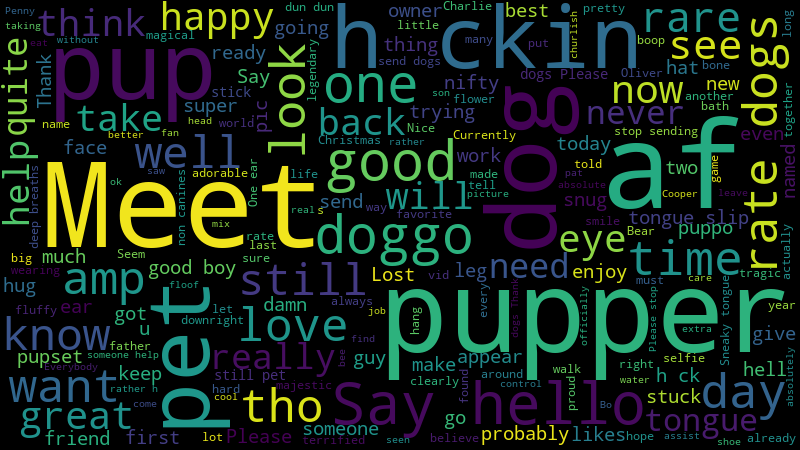

In [1970]:
# Plot the Word CLoud

wordCloud = WordCloud(width=800, height=450, random_state=30, max_font_size=120).generate(allWords)
fig = px.imshow(wordCloud, title='Most popular words as used <a href="www.twitter.com/dog_rates">by WeRateDogs</a>', width=1000, height=600)
fig.update_layout(showlegend=False)
fig.update_xaxes(visible=False)
fig.update_yaxes(visible=False)
fig.show()

In [1981]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_texts['subjectivity'] = df_texts.text.apply(getSubjectivity)
df_texts['polarity'] = df_texts.text.apply(getPolarity)

df_texts

,predicted_species,timestamp,text,subjectivity,polarity
0,Chihuahua,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,0.433333,0.366667
1,Chihuahua,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,0.450000,0.150000
2,Basset,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,0.600000,0.233333
3,Chesapeake bay retriever,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,0.662500,0.500000
4,Appenzeller,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,0.400000,0.366667
...,...,...,...,...,...
1527,Miniature pinscher,2015-11-16 00:24:50,Here we have a 1st generation vulpix. Enjoys ...,0.000000,0.000000
1528,Rhodesian ridgeback,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,0.000000,0.000000
1529,German shepherd,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,0.550000,0.500000
1530,Redbone,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,0.300000,-0.066667


In [1984]:
df_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   predicted_species  1532 non-null   object        
 1   timestamp          1532 non-null   datetime64[ns]
 2   text               1532 non-null   object        
 3   subjectivity       1532 non-null   float64       
 4   polarity           1532 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 60.0+ KB


In [1988]:
df_texts['Attitude'] = np.NaN
def getAttitude(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return'Positive'

df_texts['attitude'] = df_texts.polarity.apply(getAttitude)

C:\Users\tevinaduma\AppData\Local\Temp\ipykernel_12372\2403068687.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,predicted_species,timestamp,text,subjectivity,polarity,Attitude
0,Chihuahua,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,0.433333,0.366667,Positive
1,Chihuahua,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,0.450000,0.150000,Positive
2,Basset,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,0.600000,0.233333,Positive
3,Chesapeake bay retriever,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,0.662500,0.500000,Positive
4,Appenzeller,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,0.400000,0.366667,Positive
...,...,...,...,...,...,...
1527,Miniature pinscher,2015-11-16 00:24:50,Here we have a 1st generation vulpix. Enjoys ...,0.000000,0.000000,Neutral
1528,Rhodesian ridgeback,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,0.000000,0.000000,Neutral
1529,German shepherd,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,0.550000,0.500000,Positive
1530,Redbone,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,0.300000,-0.066667,Negative


In [1989]:
df_texts.text[1530]

'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here.  would walk the shit out of '

In [1997]:
df_texts.attitude.value_counts()

Positive    768
Neutral     440
Negative    324
Name: attitude, dtype: int64

In [2000]:
px.scatter(x=df_texts.polarity, y=df_texts.subjectivity, color=df_texts.attitude, title="Distribution of WeRateDogs tweets' sentiment analysis", labels={'x':'Polarity Score', 'y': 'Subjectivity Score', 'color': 'Attitude'})